In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import nbinom
import time
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import math
import copy
import scipy
import pickle

from scipy.stats import poisson

In [6]:
# Across all Fig 2 plots
sigmas = np.arange(0,0.99, 0.01)
betas = np.arange(0.5,3.01, 0.02)
emr_max = 0.1750813008130082

# Fig 2A (Complete Exposure)

In [7]:
def get_em_rate_fig2a(mu=1e-4, beta=1, gamma=0.5, R=0.99, sigma=0.4, sigma21=0.0):
    I=1-R
    poisson_mu = beta*(1-sigma21)*R/gamma

    z = np.arange(poisson.ppf(0.0001, poisson_mu), poisson.ppf(0.9999, poisson_mu))
    
    # Pure Poisson offspring distribution:
    #Pz = poisson.pmf(z, poisson_mu)
    #d = get_extinction_prob_from_zdist(Pz)
    
    # Offspring distribution taking exponential recovery time into account:
    #Pz = 1/poisson_mu
    d = 1/poisson_mu


    em_rate = I * mu * beta * R * (1-sigma) * (1-d)
    #print("Emergence rate:", em_rate)

    return em_rate

def get_em_rate_at_equi_fig2a(mu=1e-4, beta=1, gamma=0.5, sigma=0.4, sigma21=0):
    R = gamma/(beta * (1-sigma))
    if R > 1:
        R = 1
    er = get_em_rate_fig2a(mu=mu, beta=beta, gamma=gamma, R=R, sigma=sigma, sigma21=sigma21)
    return er

In [8]:
em_rates = []
bs_out = []
ss_out = []
n_sims = len(sigmas) * len(betas)
i=0
for s in sigmas:
    for b in betas:
        em_rates.append(get_em_rate_at_equi_fig2a(beta=b, sigma=s, mu=1, sigma21=0.0))
        bs_out.append(b)
        ss_out.append(s)
        print(f"{i} out of {n_sims}")
        i += 1

0 out of 12474
1 out of 12474
2 out of 12474
3 out of 12474
4 out of 12474
5 out of 12474
6 out of 12474
7 out of 12474
8 out of 12474
9 out of 12474
10 out of 12474
11 out of 12474
12 out of 12474
13 out of 12474
14 out of 12474
15 out of 12474
16 out of 12474
17 out of 12474
18 out of 12474
19 out of 12474
20 out of 12474
21 out of 12474
22 out of 12474
23 out of 12474
24 out of 12474
25 out of 12474
26 out of 12474
27 out of 12474
28 out of 12474
29 out of 12474
30 out of 12474
31 out of 12474
32 out of 12474
33 out of 12474
34 out of 12474
35 out of 12474
36 out of 12474
37 out of 12474
38 out of 12474
39 out of 12474
40 out of 12474
41 out of 12474
42 out of 12474
43 out of 12474
44 out of 12474
45 out of 12474
46 out of 12474
47 out of 12474
48 out of 12474
49 out of 12474
50 out of 12474
51 out of 12474
52 out of 12474
53 out of 12474
54 out of 12474
55 out of 12474
56 out of 12474
57 out of 12474
58 out of 12474
59 out of 12474
60 out of 12474
61 out of 12474
62 out of 12474
63

8046 out of 12474
8047 out of 12474
8048 out of 12474
8049 out of 12474
8050 out of 12474
8051 out of 12474
8052 out of 12474
8053 out of 12474
8054 out of 12474
8055 out of 12474
8056 out of 12474
8057 out of 12474
8058 out of 12474
8059 out of 12474
8060 out of 12474
8061 out of 12474
8062 out of 12474
8063 out of 12474
8064 out of 12474
8065 out of 12474
8066 out of 12474
8067 out of 12474
8068 out of 12474
8069 out of 12474
8070 out of 12474
8071 out of 12474
8072 out of 12474
8073 out of 12474
8074 out of 12474
8075 out of 12474
8076 out of 12474
8077 out of 12474
8078 out of 12474
8079 out of 12474
8080 out of 12474
8081 out of 12474
8082 out of 12474
8083 out of 12474
8084 out of 12474
8085 out of 12474
8086 out of 12474
8087 out of 12474
8088 out of 12474
8089 out of 12474
8090 out of 12474
8091 out of 12474
8092 out of 12474
8093 out of 12474
8094 out of 12474
8095 out of 12474
8096 out of 12474
8097 out of 12474
8098 out of 12474
8099 out of 12474
8100 out of 12474
8101 out o

9056 out of 12474
9057 out of 12474
9058 out of 12474
9059 out of 12474
9060 out of 12474
9061 out of 12474
9062 out of 12474
9063 out of 12474
9064 out of 12474
9065 out of 12474
9066 out of 12474
9067 out of 12474
9068 out of 12474
9069 out of 12474
9070 out of 12474
9071 out of 12474
9072 out of 12474
9073 out of 12474
9074 out of 12474
9075 out of 12474
9076 out of 12474
9077 out of 12474
9078 out of 12474
9079 out of 12474
9080 out of 12474
9081 out of 12474
9082 out of 12474
9083 out of 12474
9084 out of 12474
9085 out of 12474
9086 out of 12474
9087 out of 12474
9088 out of 12474
9089 out of 12474
9090 out of 12474
9091 out of 12474
9092 out of 12474
9093 out of 12474
9094 out of 12474
9095 out of 12474
9096 out of 12474
9097 out of 12474
9098 out of 12474
9099 out of 12474
9100 out of 12474
9101 out of 12474
9102 out of 12474
9103 out of 12474
9104 out of 12474
9105 out of 12474
9106 out of 12474
9107 out of 12474
9108 out of 12474
9109 out of 12474
9110 out of 12474
9111 out o

10037 out of 12474
10038 out of 12474
10039 out of 12474
10040 out of 12474
10041 out of 12474
10042 out of 12474
10043 out of 12474
10044 out of 12474
10045 out of 12474
10046 out of 12474
10047 out of 12474
10048 out of 12474
10049 out of 12474
10050 out of 12474
10051 out of 12474
10052 out of 12474
10053 out of 12474
10054 out of 12474
10055 out of 12474
10056 out of 12474
10057 out of 12474
10058 out of 12474
10059 out of 12474
10060 out of 12474
10061 out of 12474
10062 out of 12474
10063 out of 12474
10064 out of 12474
10065 out of 12474
10066 out of 12474
10067 out of 12474
10068 out of 12474
10069 out of 12474
10070 out of 12474
10071 out of 12474
10072 out of 12474
10073 out of 12474
10074 out of 12474
10075 out of 12474
10076 out of 12474
10077 out of 12474
10078 out of 12474
10079 out of 12474
10080 out of 12474
10081 out of 12474
10082 out of 12474
10083 out of 12474
10084 out of 12474
10085 out of 12474
10086 out of 12474
10087 out of 12474
10088 out of 12474
10089 out of

10955 out of 12474
10956 out of 12474
10957 out of 12474
10958 out of 12474
10959 out of 12474
10960 out of 12474
10961 out of 12474
10962 out of 12474
10963 out of 12474
10964 out of 12474
10965 out of 12474
10966 out of 12474
10967 out of 12474
10968 out of 12474
10969 out of 12474
10970 out of 12474
10971 out of 12474
10972 out of 12474
10973 out of 12474
10974 out of 12474
10975 out of 12474
10976 out of 12474
10977 out of 12474
10978 out of 12474
10979 out of 12474
10980 out of 12474
10981 out of 12474
10982 out of 12474
10983 out of 12474
10984 out of 12474
10985 out of 12474
10986 out of 12474
10987 out of 12474
10988 out of 12474
10989 out of 12474
10990 out of 12474
10991 out of 12474
10992 out of 12474
10993 out of 12474
10994 out of 12474
10995 out of 12474
10996 out of 12474
10997 out of 12474
10998 out of 12474
10999 out of 12474
11000 out of 12474
11001 out of 12474
11002 out of 12474
11003 out of 12474
11004 out of 12474
11005 out of 12474
11006 out of 12474
11007 out of

11948 out of 12474
11949 out of 12474
11950 out of 12474
11951 out of 12474
11952 out of 12474
11953 out of 12474
11954 out of 12474
11955 out of 12474
11956 out of 12474
11957 out of 12474
11958 out of 12474
11959 out of 12474
11960 out of 12474
11961 out of 12474
11962 out of 12474
11963 out of 12474
11964 out of 12474
11965 out of 12474
11966 out of 12474
11967 out of 12474
11968 out of 12474
11969 out of 12474
11970 out of 12474
11971 out of 12474
11972 out of 12474
11973 out of 12474
11974 out of 12474
11975 out of 12474
11976 out of 12474
11977 out of 12474
11978 out of 12474
11979 out of 12474
11980 out of 12474
11981 out of 12474
11982 out of 12474
11983 out of 12474
11984 out of 12474
11985 out of 12474
11986 out of 12474
11987 out of 12474
11988 out of 12474
11989 out of 12474
11990 out of 12474
11991 out of 12474
11992 out of 12474
11993 out of 12474
11994 out of 12474
11995 out of 12474
11996 out of 12474
11997 out of 12474
11998 out of 12474
11999 out of 12474
12000 out of

Text(0.5, 1.0, '$\\beta/\\gamma=$2.5')

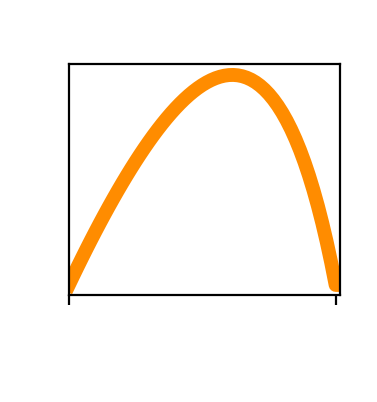

In [9]:
%matplotlib inline

fig, (ax) = plt.subplots(1, 1, dpi=200, figsize=(0.5*3.5,0.5*3))

em_rates_i = []
bs_out_i = []
ss_out_i = []
b=1.25
for s in sigmas:
    em_rates_i.append(get_em_rate_at_equi_fig2a(beta=b, sigma=s))
    ss_out_i.append(s)
    
plt.plot(ss_out_i, em_rates_i, color='darkorange', linewidth=5)
#plt.yticks([0 * 1e-5,0.5 * 1e-5,1 * 1e-5])
plt.xticks([0, 0.6, 1], labels=["0","0.6",""], color='white')
plt.yticks([])
plt.xlim([0,0.61])
plt.xlabel('Strength of immunity', color='white')
plt.ylabel('Net adaptation rate', color='white')
plt.title(r'$\beta/\gamma=$' + f'{b * 2}', color='white')

1/T between -9.015344861617813e-17 and 0.1750813008130082


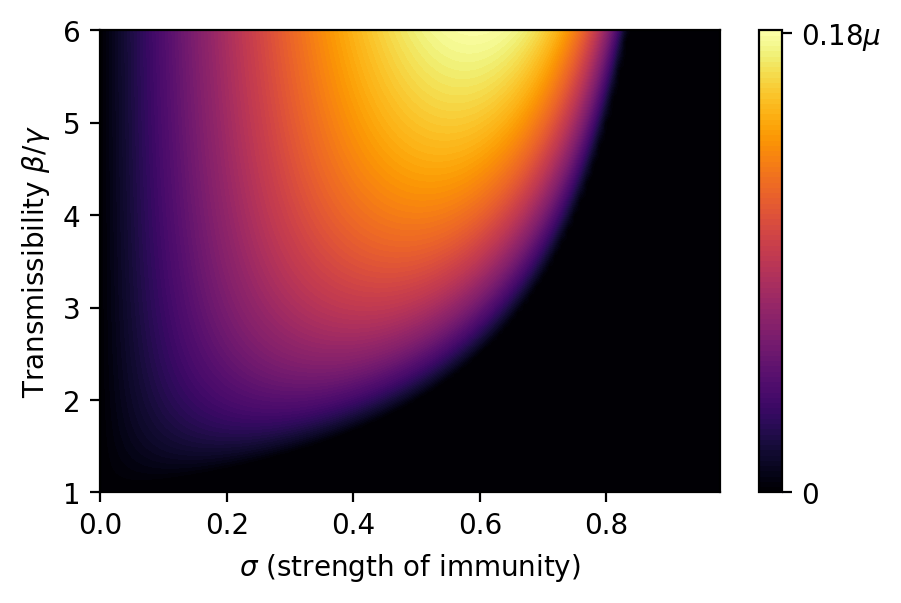

In [10]:
em_rates = np.array(em_rates)
bs_out = np.array(bs_out)
ss_out = np.array(ss_out)
from scipy.interpolate import griddata
R0s = bs_out * 2
# grid coordinates for contour plot
sigma_grid, R0_grid = np.mgrid[min(ss_out):max(ss_out):200j, min(R0s):max(R0s):200j]

# Interpolate
T_grid = griddata((ss_out, R0s), em_rates, (sigma_grid, R0_grid), method='linear')

# some values will show up as e.g. -1e-25, due to numerical effects.
# so set those to zero:
T_grid[T_grid < 0] = 0


print("1/T between", np.min(em_rates), "and", np.max(em_rates))

# Create the contour plot

plt.figure(figsize=(5, 3), dpi=200)
plt.contourf(sigma_grid, R0_grid, T_grid, levels=100, cmap='inferno')


cbar = plt.colorbar()
plt.clim(0, emr_max) # sigma21 = 0

cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)

cbar.set_ticks([0, np.max(em_rates)])
cbar.ax.set_yticklabels(["0", f"{np.round(np.max(em_rates),2)}"+r"$\mu$"  ])  # vertically oriented colorbar
plt.xlabel(r'$\sigma$ (strength of immunity)')
plt.ylabel(r'Transmissibility $\beta/\gamma$')
#plt.title('Net adaptation rate (leaky immunity)')
plt.show()

# Fig 2B (Endemic Equilibrium)

In [11]:
def get_em_rate_fig2b(S, I, R, mu=1e-4, beta=1, gamma=0.5, sigma=0.4, sigma21=0.0):
    
    poisson_mu = beta*(1-sigma21)*R/gamma + beta*S/gamma

    # For pure Poisson offspring distribution:
    # z = np.arange(poisson.ppf(0.0001, poisson_mu), poisson.ppf(0.9999, poisson_mu))
    #Pz = poisson.pmf(z, poisson_mu)
    #d = get_extinction_prob_from_zdist(Pz)
    
    # With exponential recovery time:
    d = 1/poisson_mu

    em_rate = I * mu * beta * (S + (1-sigma)*R) * (1-d)
    #print("Emergence rate:", em_rate)

    return em_rate

def get_endemic_levels(beta=1, gamma=0.5, sigma=0.4, sigma21=0, delta=1/365):
    I = (2*beta*(sigma-1))**(-1) * (gamma + delta + beta * (sigma-1) \
                                    - np.sqrt( (gamma + delta + beta*(sigma-1))**2 \
                                    - 4*(beta - gamma)*delta*(sigma-1) ) )
    S = delta * (1-I)/(beta * I + delta)
    R = 1-(S+I)
    return S, I, R

def get_em_rate_at_endemic_equi(mu=1e-4, beta=1, gamma=0.5, sigma=0.4, sigma21=0, delta=1/365):
    S, I, R = get_endemic_levels(beta=beta, gamma=gamma, sigma=sigma, sigma21=sigma21, delta=delta)
    er = get_em_rate_fig2b(S, I, R, mu=mu, beta=beta, gamma=gamma, sigma=sigma, sigma21=sigma21)
    return er

In [12]:
em_rates = []
bs_out = []
ss_out = []
n_sims = len(sigmas) * len(betas)
i=0
for s in sigmas:
    for b in betas:
        #em_rates.append(get_em_rate_at_equi(beta=b, sigma=s, mu=7e-5))
        #em_rates.append(get_em_rate_at_equi(beta=b, sigma=s, mu=1e-4))
        em_rates.append(get_em_rate_at_endemic_equi(beta=b, sigma=s, mu=1, sigma21=0.0, delta=1/30 ))
        bs_out.append(b)
        ss_out.append(s)
        print(f"{i} out of {n_sims}")
        i += 1

0 out of 12474
1 out of 12474
2 out of 12474
3 out of 12474
4 out of 12474
5 out of 12474
6 out of 12474
7 out of 12474
8 out of 12474
9 out of 12474
10 out of 12474
11 out of 12474
12 out of 12474
13 out of 12474
14 out of 12474
15 out of 12474
16 out of 12474
17 out of 12474
18 out of 12474
19 out of 12474
20 out of 12474
21 out of 12474
22 out of 12474
23 out of 12474
24 out of 12474
25 out of 12474
26 out of 12474
27 out of 12474
28 out of 12474
29 out of 12474
30 out of 12474
31 out of 12474
32 out of 12474
33 out of 12474
34 out of 12474
35 out of 12474
36 out of 12474
37 out of 12474
38 out of 12474
39 out of 12474
40 out of 12474
41 out of 12474
42 out of 12474
43 out of 12474
44 out of 12474
45 out of 12474
46 out of 12474
47 out of 12474
48 out of 12474
49 out of 12474
50 out of 12474
51 out of 12474
52 out of 12474
53 out of 12474
54 out of 12474
55 out of 12474
56 out of 12474
57 out of 12474
58 out of 12474
59 out of 12474
60 out of 12474
61 out of 12474
62 out of 12474
63

1/T between -5.488567347090558e-16 and 0.17507577591644177


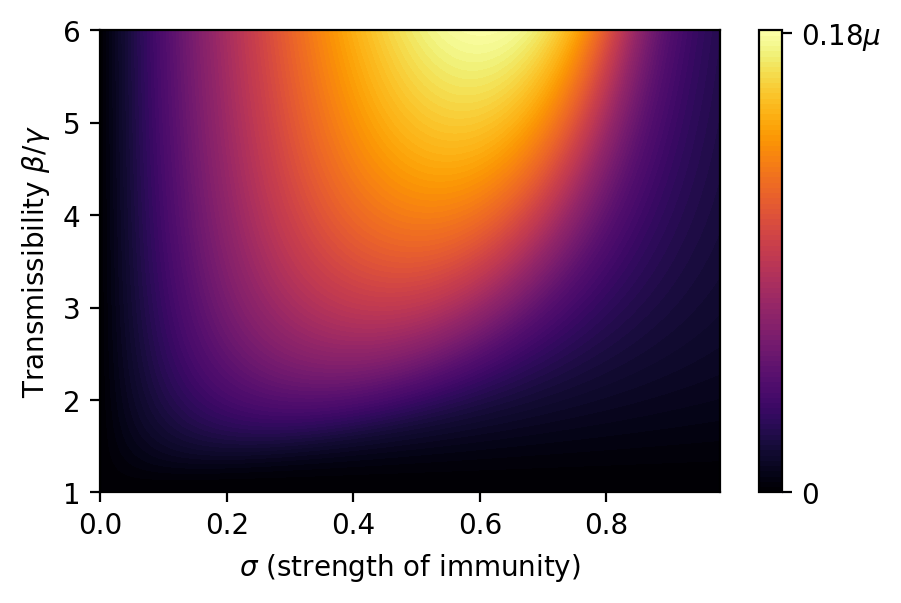

In [13]:
em_rates = np.array(em_rates)
bs_out = np.array(bs_out)
ss_out = np.array(ss_out)

from scipy.interpolate import griddata
R0s = bs_out * 2
# grid coordinates for contour plot
sigma_grid, R0_grid = np.mgrid[min(ss_out):max(ss_out):200j, min(R0s):max(R0s):200j]

# Interpolate
T_grid = griddata((ss_out, R0s), em_rates, (sigma_grid, R0_grid), method='linear')

# some values will show up as e.g. -1e-25, due to numerical effects.
# so set those to zero:
T_grid[T_grid < 0] = 0


print("1/T between", np.min(em_rates), "and", np.max(em_rates))

# Create the contour plot

plt.figure(figsize=(5, 3), dpi=200)
plt.contourf(sigma_grid, R0_grid, T_grid, levels=100, cmap='inferno')
cbar = plt.colorbar()
plt.clim(0, emr_max) # sigma21 = 0

cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)

cbar.set_ticks([0, np.max(em_rates)])
cbar.ax.set_yticklabels(["0", f"{np.round(np.max(em_rates),2)}"+r"$\mu$"  ])  # vertically oriented colorbar

plt.xlabel(r'$\sigma$ (strength of immunity)')
plt.ylabel(r'Transmissibility $\beta/\gamma$')
#plt.title('Net adaptation rate (leaky immunity)')
plt.show()

# Fig 2C (Waning all-or-nothing immunity)

In [14]:
def get_em_rate_fig2c(S, I, R, mu=1e-4, beta=1, gamma=0.5, sigma=0.4, sigma21=0.0):
    
    poisson_mu = beta*(1-sigma21)*R/gamma + beta*S/gamma

    # For pure Poisson offspring distribution:
    # z = np.arange(poisson.ppf(0.0001, poisson_mu), poisson.ppf(0.9999, poisson_mu))
    #Pz = poisson.pmf(z, poisson_mu)
    #d = get_extinction_prob_from_zdist(Pz)
    
    # With exponential recovery time:
    d = 1/poisson_mu

    em_rate = I * mu * beta * (S + (1-sigma)*R) * (1-d)
    #print("Emergence rate:", em_rate)

    return em_rate

def get_endemic_levels(beta=1, gamma=0.5, sigma=0.4, sigma21=0, delta=1/365):
    I = (2*beta*(sigma-1))**(-1) * (gamma + delta + beta * (sigma-1) \
                                    - np.sqrt( (gamma + delta + beta*(sigma-1))**2 \
                                    - 4*(beta - gamma)*delta*(sigma-1) ) )
    S = delta * (1-I)/(beta * I + delta)
    R = 1-(S+I)
    return S, I, R

def get_em_rate_at_endemic_equi_2c(mu=1e-4, beta=1, gamma=0.5, sigma=0.4, sigma21=0, delta=1/365):
    S, I, R = get_endemic_levels(beta=beta, gamma=gamma, sigma=sigma, sigma21=sigma21, delta=delta)
    er = get_em_rate_fig2c(S, I, R, mu=mu, beta=beta, gamma=gamma, sigma=sigma, sigma21=sigma21)
    return er

In [15]:
sigma = 0.999
deltas = np.array(list(np.arange(1/365, 1, 10/365)) + list(np.arange(1, 100.18, 100/365)))
em_rates = []
bs_out = []
ds_out = []
n_sims = len(deltas) * len(betas)
i=0
for d in deltas:
    for b in betas:
        em_rates.append(get_em_rate_at_endemic_equi_2c(beta=b, sigma=sigma, mu=1, sigma21=0.0, delta=d))
        bs_out.append(b)
        ds_out.append(d)
        print(f"{i} out of {n_sims}")
        i += 1

0 out of 50400
1 out of 50400
2 out of 50400
3 out of 50400
4 out of 50400
5 out of 50400
6 out of 50400
7 out of 50400
8 out of 50400
9 out of 50400
10 out of 50400
11 out of 50400
12 out of 50400
13 out of 50400
14 out of 50400
15 out of 50400
16 out of 50400
17 out of 50400
18 out of 50400
19 out of 50400
20 out of 50400
21 out of 50400
22 out of 50400
23 out of 50400
24 out of 50400
25 out of 50400
26 out of 50400
27 out of 50400
28 out of 50400
29 out of 50400
30 out of 50400
31 out of 50400
32 out of 50400
33 out of 50400
34 out of 50400
35 out of 50400
36 out of 50400
37 out of 50400
38 out of 50400
39 out of 50400
40 out of 50400
41 out of 50400
42 out of 50400
43 out of 50400
44 out of 50400
45 out of 50400
46 out of 50400
47 out of 50400
48 out of 50400
49 out of 50400
50 out of 50400
51 out of 50400
52 out of 50400
53 out of 50400
54 out of 50400
55 out of 50400
56 out of 50400
57 out of 50400
58 out of 50400
59 out of 50400
60 out of 50400
61 out of 50400
62 out of 50400
63

1/T between -0.0 and 0.1750220295453125


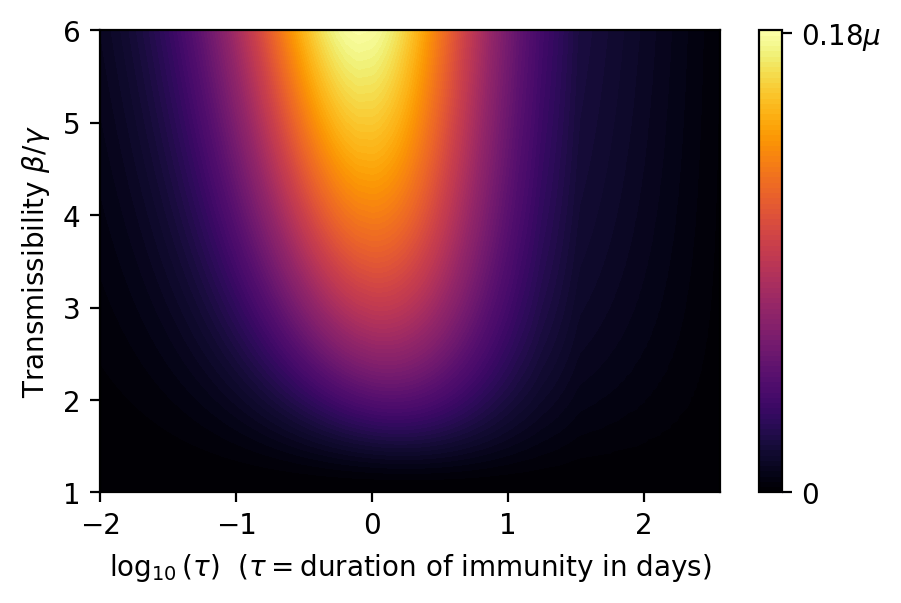

In [17]:
em_rates = np.array(em_rates)
bs_out = np.array(bs_out)
ss_out = np.log10(1/np.array(ds_out))

from scipy.interpolate import griddata
R0s = bs_out * 2
# grid coordinates for contour plot
sigma_grid, R0_grid = np.mgrid[min(ss_out):max(ss_out):200j, min(R0s):max(R0s):200j]

# Interpolate
T_grid = griddata((ss_out, R0s), em_rates, (sigma_grid, R0_grid), method='linear')

# some values will show up as e.g. -1e-25, due to numerical effects.
# so set those to zero:
T_grid[T_grid < 0] = 0


print("1/T between", np.min(em_rates), "and", np.max(em_rates))

# Create the contour plot

plt.figure(figsize=(5, 3), dpi=200)
plt.contourf(sigma_grid, R0_grid, T_grid, levels=100, cmap='inferno')
cbar = plt.colorbar()
plt.clim(0, emr_max) # sigma21 = 0

cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)

cbar.set_ticks([0, np.max(em_rates)])
cbar.ax.set_yticklabels(["0", f"{np.round(np.max(em_rates),2)}"+r"$\mu$"  ])  # vertically oriented colorbar
plt.xlabel(r'$\log_{10}(\tau)$  ($\tau=$duration of immunity in days)')
plt.ylabel(r'Transmissibility $\beta/\gamma$')
plt.show()